## 1. Connexion à la base de données

In [11]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
df.head()

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501


## 2. Définir les compétences des offres d'emploi

In [12]:
import re
# Load keywords from a CSV file without headers
keywords_df = pd.read_csv('skills.csv', header=None)  # Replace 'skills.csv' with your file path
keyword_list = keywords_df[0].tolist()

# Function to find keywords in the description
def find_keywords(description, skills_list):
    contained_skills = []
    for skill in skills_list:
        # Create a regex pattern that matches the skill with word boundaries
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, description, re.IGNORECASE):
            contained_skills.append(skill)
    if len(contained_skills) == 0:
        return None
    else:
        return ', '.join(contained_skills)

# Apply the function to create the new column
df['skills'] = df['description'].apply(lambda desc: find_keywords(desc, keyword_list))
df.head()

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp,skills
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT,None
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501,"sql, python, go, snowflake, airflow, tableau"
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501,None
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501,"sql, python, aws, redshift, looker"
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501,"sql, python"


## 3. Compétences les plus demandées

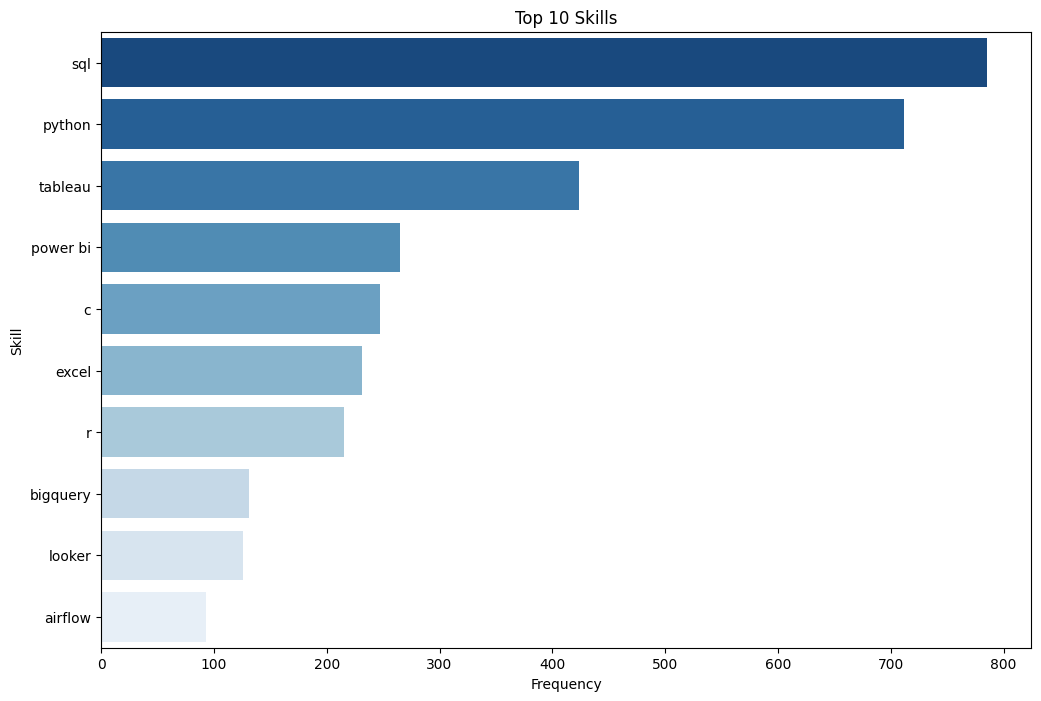

In [13]:
# Create a new DataFrame with the skills and their frequencies
skills_df = df['skills'].str.get_dummies(sep=', ')
skills_frequencies = skills_df.sum().sort_values(ascending=False)

# Get the top 10 skills
top_10_skills = skills_frequencies.head(10)

# Plotting the top 10 skills
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_skills.values, y=top_10_skills.index, palette="Blues_r")
plt.title('Top 10 Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

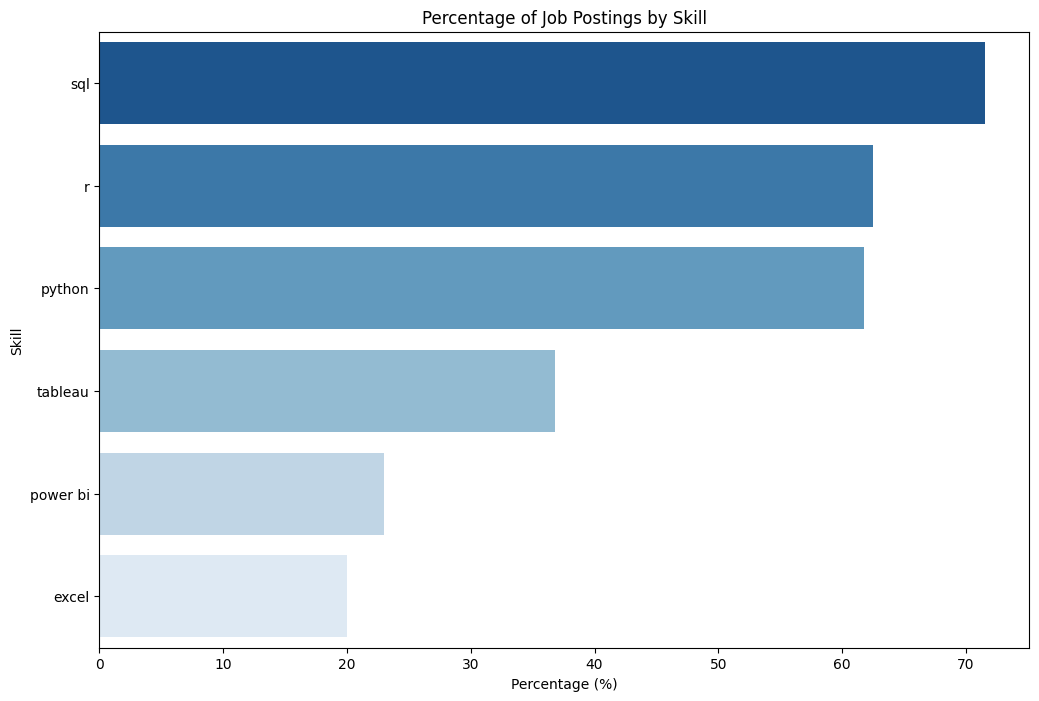

In [15]:
df = df[df["skills"].notnull()]
# List of selected skills
selected_skills = ['sql', 'excel', 'python', 'r', 'tableau', 'power bi']

# Count occurrences of each skill
skills_count = {skill: sum(df['skills'].apply(lambda x: skill in x)) for skill in selected_skills}

# Convert counts to percentages
total_postings = len(df)
skills_percentage = {skill: (count / total_postings * 100) for skill, count in skills_count.items()}

# Data for plotting
skills_data = pd.DataFrame(list(skills_percentage.items()), columns=['Skill', 'Percentage']).sort_values(by='Percentage', ascending=False)

# Plotting the percentage of job postings by skill
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Skill', data=skills_data, palette="Blues_r")
plt.title('Percentage of Job Postings by Skill')
plt.xlabel('Percentage (%)')
plt.ylabel('Skill')
plt.show()

## 4. Correlation entre les compétences

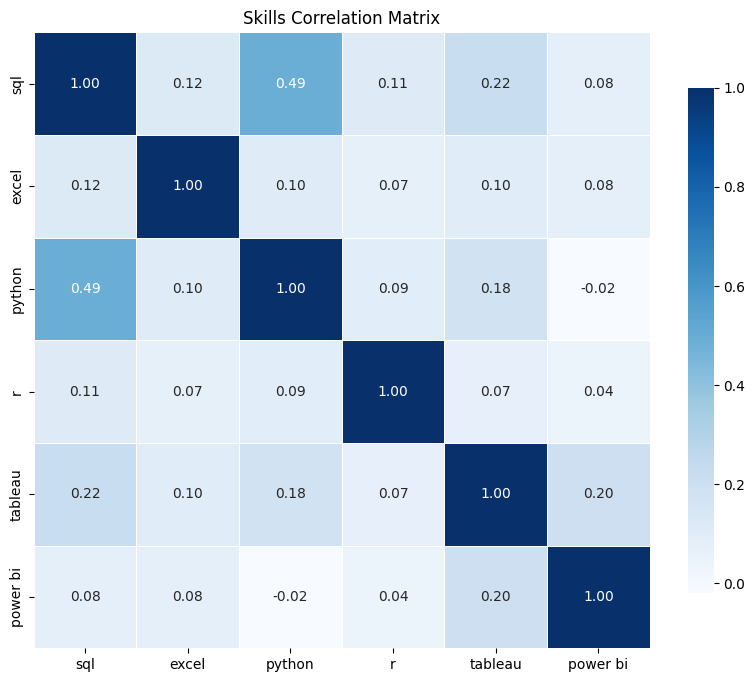

In [ ]:
import numpy as np

# Initialize a DataFrame to store the presence (1) or absence (0) of each skill in each job description
skills_matrix = pd.DataFrame(0, index=df.index, columns=selected_skills)

# Populate the matrix with the presence or absence of skills
for skill in selected_skills:
    skills_matrix[skill] = df['description'].apply(lambda x: 1 if skill in x.lower() else 0)

# Calculate the correlation matrix
correlation_matrix = skills_matrix.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Skills Correlation Matrix')
plt.show()
